# Wine Quality Prediction

Data Set: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

We will use Whine_Quality_White.

Input variables (based on physicochemical tests):

    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol

Output variable (based on sensory data):

    12 - quality (score between 0 and 10)

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

# Get the Data

In [4]:
wine = pd.read_csv('winequality-white.csv', sep = ';')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Variable Content

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* All numerical variables

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Check Missing Data

<AxesSubplot:>

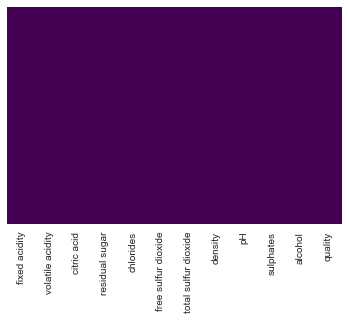

In [8]:
sns.heatmap(data = wine.isnull(),yticklabels = False, cbar = False, cmap = 'viridis' )

* No missing data

# Exploratory Data Analysis (EDA)

In [9]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Response Variable: Quality

<AxesSubplot:xlabel='quality', ylabel='count'>

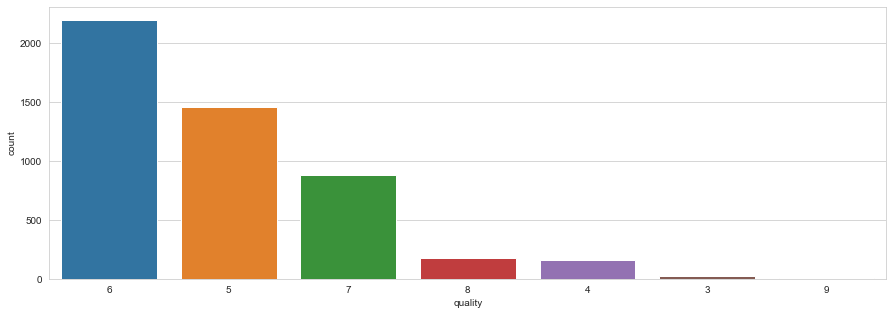

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data = wine, x = 'quality', order = wine['quality'].value_counts().index)

In [11]:
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## New Variable: Wine Quality

In [12]:
white = wine.copy()

In [13]:
white['wine_quality'] = np.where(white['quality'] > 6, 1, 0)

In [14]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


<AxesSubplot:xlabel='wine_quality', ylabel='count'>

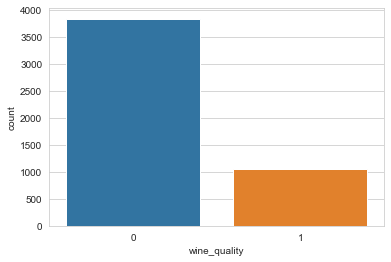

In [15]:
sns.countplot(data = white, x = 'wine_quality')

In [16]:
white.drop('quality', axis = 1, inplace = True)

In [17]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


### Fixed Acidity vs Wine Quality

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

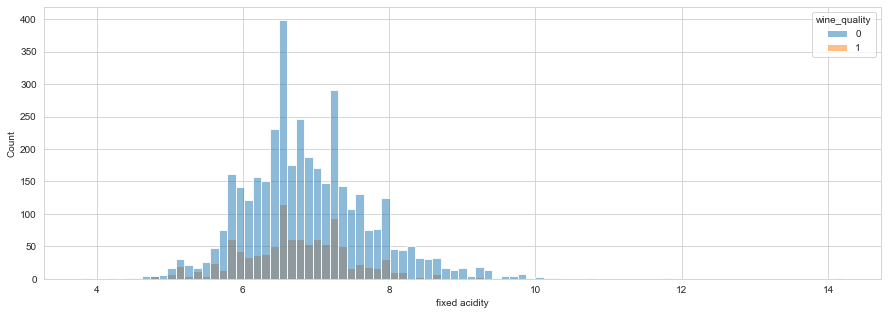

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'fixed acidity', hue = 'wine_quality')

* Data indicates low or no relationship between Fixed Acidity and Wine Quality

### Volatile Acidity vs Wine Quality

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

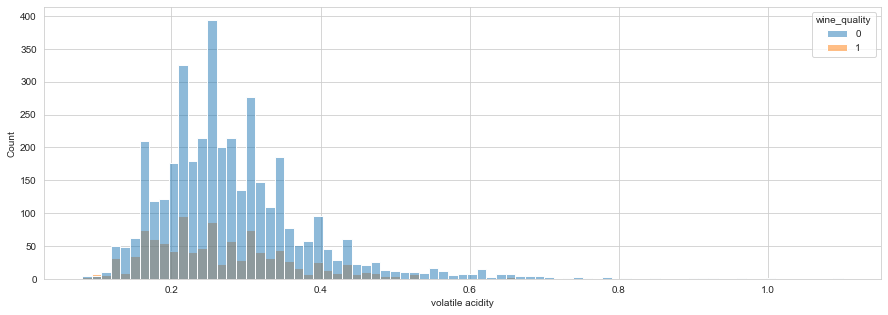

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'volatile acidity', hue = 'wine_quality')

* Data indicates low or no relationship between Volatile Acidity and Wine Quality

### Citric Acid vs Wine Quality

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

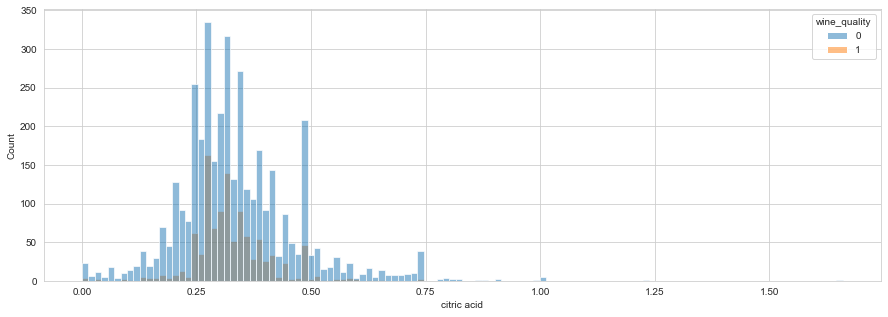

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'citric acid', hue = 'wine_quality')

* Data indicates low or no relationship between Citric Acid and Wine Quality

### Residual Sugar vs Wine Quality

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

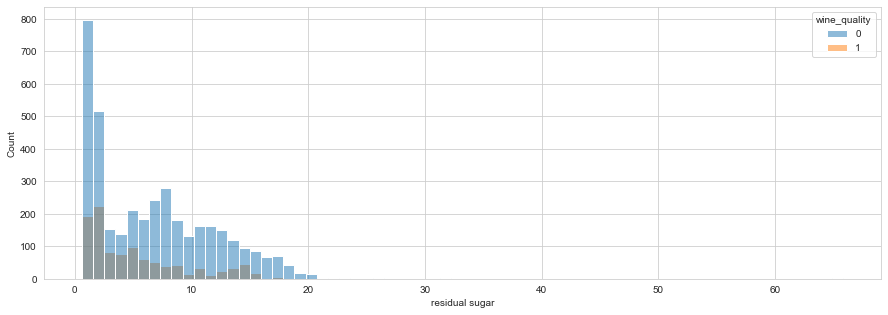

In [21]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'residual sugar', hue = 'wine_quality')

* Data indicates low or no relationship between Residual Sugar and Wine Quality

### Chlorides vs Wine Quality

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

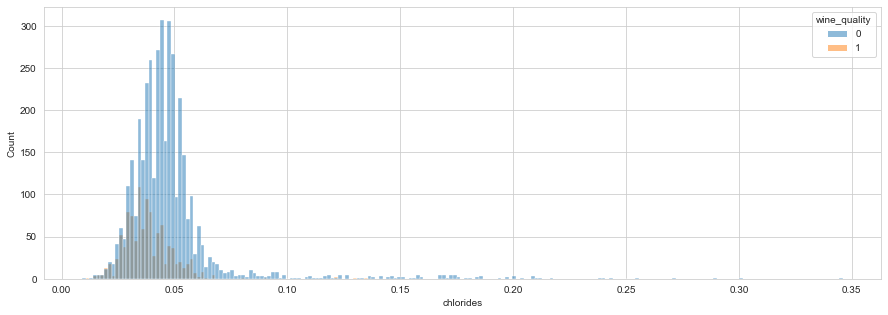

In [22]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'chlorides', hue = 'wine_quality')

* Data indicates low inverse relationship between Chlorides and Wine Quality

### Free Sulfur Dioxide vs Wine Quality

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

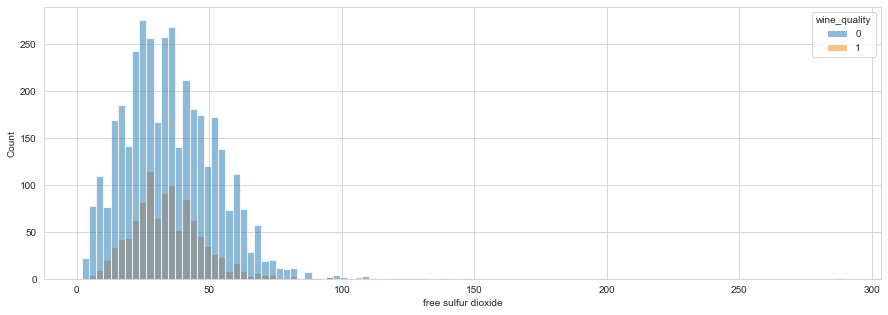

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'free sulfur dioxide', hue = 'wine_quality')

* Data indicates low or no relationship between Free Sulfur Dioxie and Wine Quality

### Total Sulfur Dioxide vs Wine Quality

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

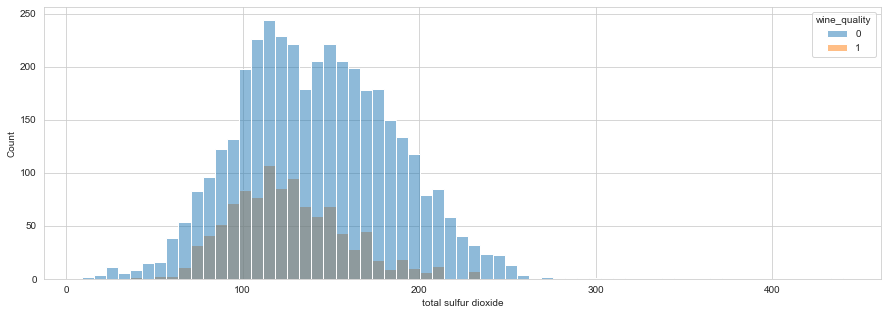

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'total sulfur dioxide', hue = 'wine_quality')

* Data indicates low inverse relationship between Total Sulfur Dioxide and Wine Quality

### Density vs Wine Quality

<AxesSubplot:xlabel='density', ylabel='Count'>

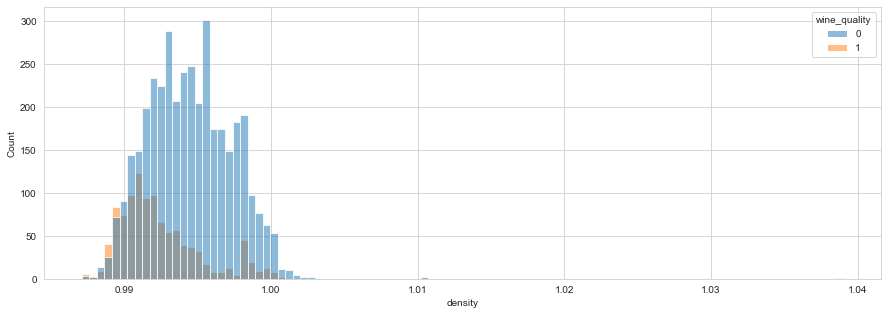

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'density', hue = 'wine_quality')

* Data indicates some inverse relationship between Density and Wine Quality

### pH vs Wine Quality

<AxesSubplot:xlabel='pH', ylabel='Count'>

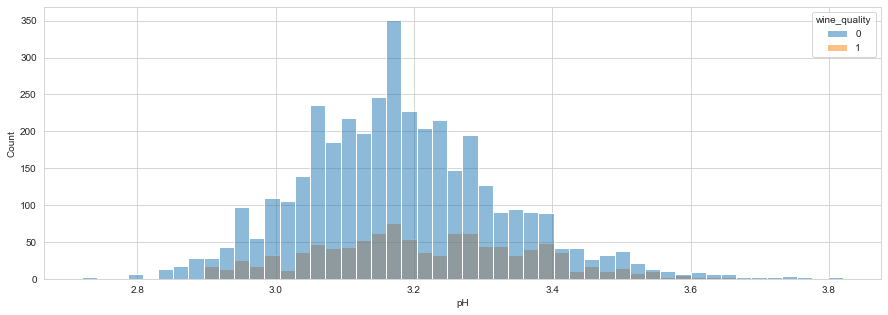

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'pH', hue = 'wine_quality')

* Data indicates low or no relationship between pH and Wine Quality

### Sulphates vs Wine Quality

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

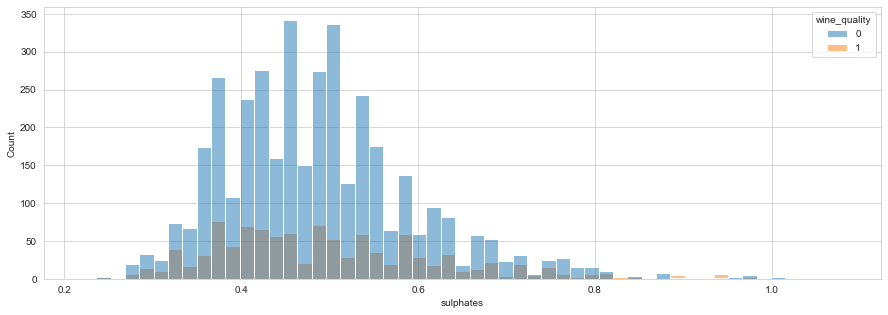

In [27]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'sulphates', hue = 'wine_quality')

* Data indicates low or no relationship between Sulphates and Wine Quality

### Alcohol vs Wine Quality

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

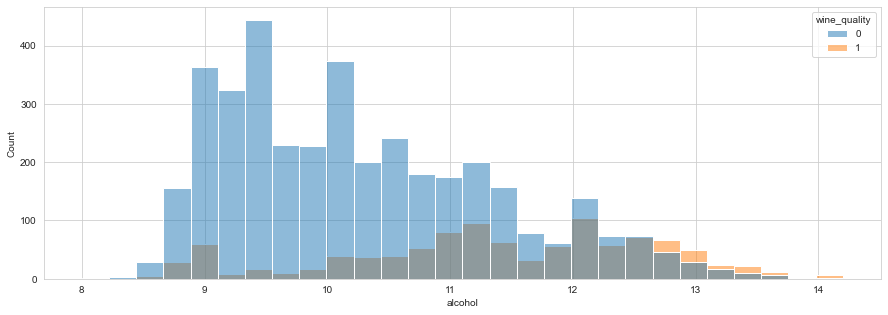

In [28]:
plt.figure(figsize=(15,5))
sns.histplot(data = white, x = 'alcohol', hue = 'wine_quality')

* Data indicates some relationship between Alcohol and Wine Quality

## Variable Correlation

<AxesSubplot:>

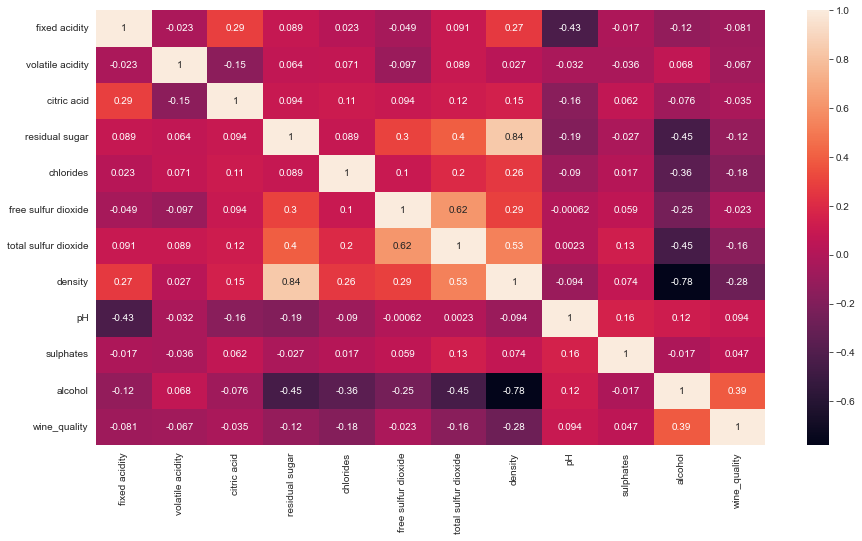

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(data = white.corr(), annot = True)

### Alcohol vs Density

<Figure size 1080x360 with 0 Axes>

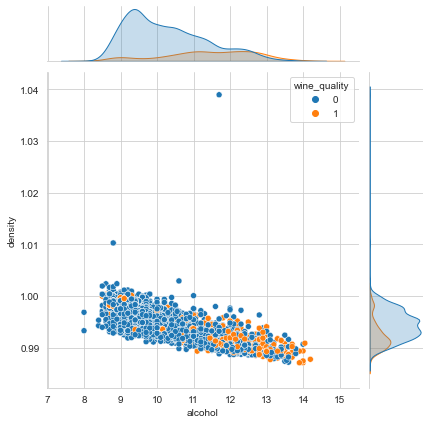

In [30]:
plt.figure(figsize=(15,5))
sns.jointplot(data = white, x = 'alcohol', y = 'density', hue = 'wine_quality')

# Normalizing Variables

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(white.drop('wine_quality', axis = 1))

StandardScaler()

In [34]:
scaled_features = scaler.transform(white.drop('wine_quality', axis = 1))

In [35]:
white_feat = pd.DataFrame(data = scaled_features, columns = white.columns[:-1])

In [36]:
white_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


# Training and Testing Data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = white_feat
y = white['wine_quality']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Training the Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

### k = 1

In [41]:
model = KNeighborsClassifier(n_neighbors = 1)

In [42]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Predicting Test Data

In [43]:
pred = model.predict(X_test)

## Evaluating the Model

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[711  74]
 [ 52 143]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       785
           1       0.66      0.73      0.69       195

    accuracy                           0.87       980
   macro avg       0.80      0.82      0.81       980
weighted avg       0.88      0.87      0.87       980



## Apply Elbow Method to Discover Optimal k Value

### Metric: Euclidean / Weights: Uniform

In [66]:
error_rate = []

for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

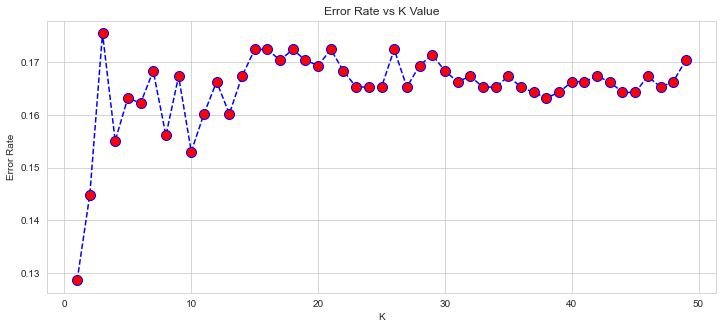

In [67]:
plt.figure(figsize = (12,5))
plt.plot(range(1,50), error_rate, color='blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor ='red',
         markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
error_rate[9]

0.15306122448979592

### Metric: Euclidean / Weights: Distance

In [69]:
error_rate = []

for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

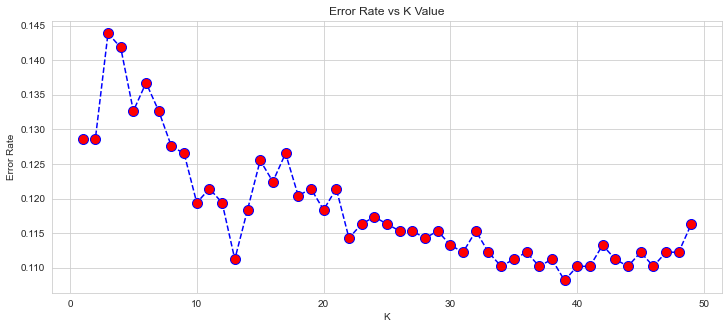

In [70]:
plt.figure(figsize = (12,5))
plt.plot(range(1,50), error_rate, color='blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor ='red',
         markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
error_rate[12]

0.11122448979591837

### Metric: Manhattan / Weights: Uniform

In [72]:
error_rate = []

for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

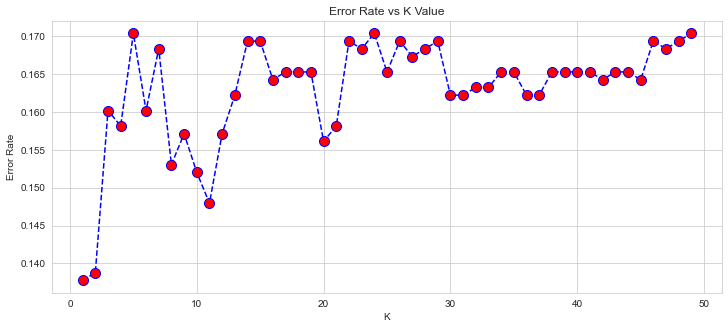

In [73]:
plt.figure(figsize = (12,5))
plt.plot(range(1,50), error_rate, color='blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor ='red',
         markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [74]:
error_rate[10]

0.14795918367346939

### Metric: Manhattan / Weights: Distance

In [75]:
error_rate = []

for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors = i, metric= 'manhattan', weights= 'distance')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

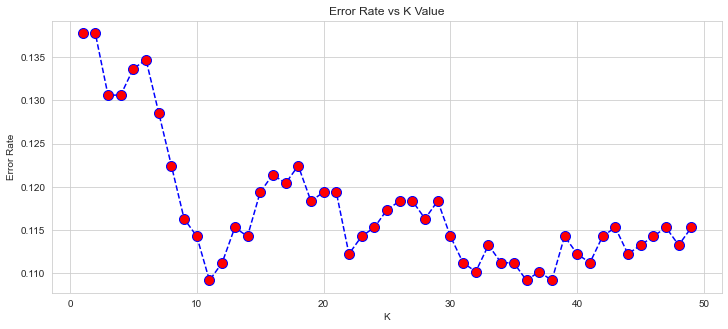

In [76]:
plt.figure(figsize = (12,5))
plt.plot(range(1,50), error_rate, color='blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor ='red',
         markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [78]:
error_rate[10]

0.10918367346938776

The following combination of paramaters presented the best performance:
* __n_neighbours__ = 11
* __metric__ = 'manhattan'
* __weights__ = 'distance'


## Optimal Results

In [52]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [53]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[744  41]
 [ 66 129]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       785
           1       0.76      0.66      0.71       195

    accuracy                           0.89       980
   macro avg       0.84      0.80      0.82       980
weighted avg       0.89      0.89      0.89       980

